In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

torch.Size([4, 3, 32, 32])


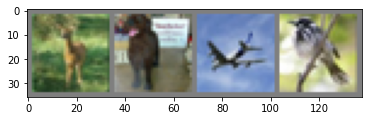

 deer   dog plane  bird


In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [9]:
#print(dict(net.named_parameters()))

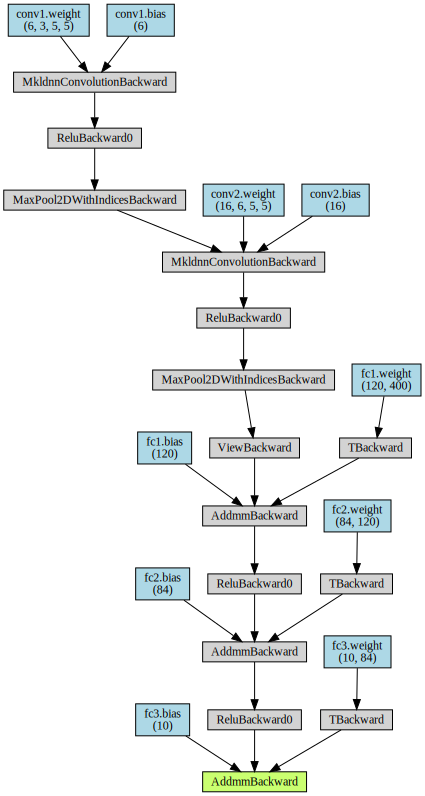

In [10]:
from torchviz import make_dot

# Reference: https://www.msdd.info/entry/2019/12/22/080000
#model=TestModel()
#x=torch.randn(1,10)
#y=model(x)
#make_dot(y,params=dict(model.named_parameters()))

# Reference: https://nori-life-log.com/pytorch%E3%81%AE%E3%83%A2%E3%83%87%E3%83%AB%E3%82%92%E5%8F%AF%E8%A6%96%E5%8C%96%E3%81%99%E3%82%8B
#x = torch.zeros(1, 3, 224, 224, dtype=torch.float, requires_grad=False)
#out = alex(x)
#dot = make_dot(out)
#dot.format = 'png'
#dot.render('graph_image')

x = torch.zeros(1, 3, 32, 32, dtype=torch.float, requires_grad=False)
y = net(x)
make_dot(y, params=dict(net.named_parameters()))

In [11]:
net = Net()

In [12]:
import torch.optim as optim

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train

In [14]:
for epoch in range(2):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.195
[1,  4000] loss: 1.855
[1,  6000] loss: 1.696
[1,  8000] loss: 1.585
[1, 10000] loss: 1.531
[1, 12000] loss: 1.458
[2,  2000] loss: 1.417
[2,  4000] loss: 1.366
[2,  6000] loss: 1.344
[2,  8000] loss: 1.305
[2, 10000] loss: 1.301
[2, 12000] loss: 1.257
Finished Training


In [15]:
PATH = 'data/cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Test

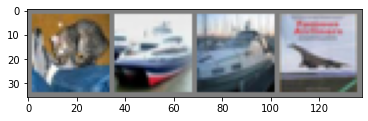

GroundTruth:    cat  ship  ship plane


In [16]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [17]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [18]:
outputs = net(images)

In [19]:
outputs

tensor([[ 0.4982, -1.4916,  0.9216,  1.2394, -0.0748,  0.5124, -0.5169, -0.4759,
          0.4168, -1.0526],
        [ 4.3070,  3.7999, -0.4889, -2.5382, -1.2077, -4.7074, -3.0914, -3.7998,
          5.6471,  2.5546],
        [ 2.5792,  2.2078, -0.1035, -1.5751, -1.1586, -2.8125, -2.5568, -1.6998,
          2.6715,  2.3524],
        [ 3.8126,  0.8164,  0.5588, -1.5453, -0.4135, -3.7790, -2.0632, -3.8723,
          5.4608,  0.9503]], grad_fn=<AddmmBackward>)

In [20]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [21]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [22]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()

        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 76 %
Accuracy of  bird : 54 %
Accuracy of   cat : 21 %
Accuracy of  deer : 33 %
Accuracy of   dog : 43 %
Accuracy of  frog : 70 %
Accuracy of horse : 65 %
Accuracy of  ship : 74 %
Accuracy of truck : 52 %
